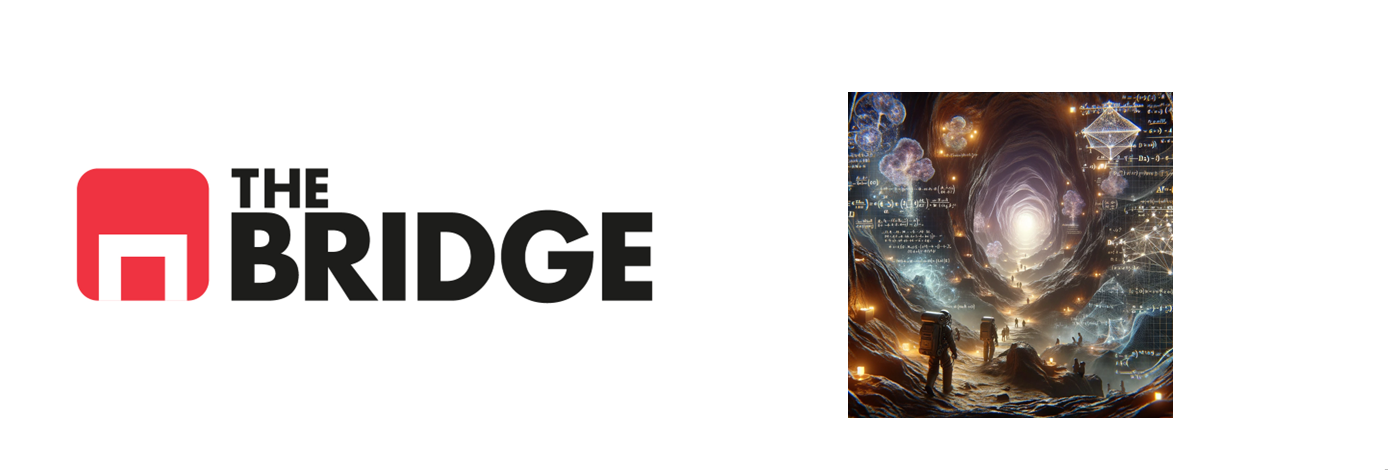![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [13]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC,Recall,Accuracy,Precision
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.optimizers import Adam, ReduceLROnPlateau
# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Dispositivos disponibles: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Dispositivo actual: /device:GPU:0


## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

![image.png](attachment:image.png)

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada.

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

Ejemplo del grafico de predicción más nivel de confianza:

![image.png](attachment:image.png)

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado.

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

In [51]:
dt = fetch_openml('Fashion-MNIST')

In [17]:
label_class_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


In [49]:
labels=pd.DataFrame([label_class_dict])
labels


,0,1,2,3,4,5,6,7,8,9
0,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot


In [19]:
# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.min()

0

In [20]:
train_images.max()

255

SPLITS

In [21]:
# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [22]:
# Escalar las características para mejorar el rendimiento del modelo pero de una forma especial, dividiendo el numero de pixeles / el nuemro maximo 255
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [23]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [24]:
# Convertir las etiquetas a one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [25]:
y_train_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
# modelo secuencial
model = tf.keras.models.Sequential()

# Capa de aplanamiento para convertir imágenes 2D en un vector 1D
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Primera capa densa  y activación ReLU
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))

# Segunda capa densa y activación ReLU
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase) y activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['Recall'])


#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_one_hot, batch_size=1024 ,epochs=1000, validation_split=0.1)

#print(history.history.keys())

# Predicción
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#nombres de la etiquetas reales segun el diccionario creado mas arriba
y_pred_names = [label_class_dict[class_num] for class_num in y_pred_classes]
print(y_pred_names)
# Resumen del modelo
model.summary()


Train on 43200 samples, validate on 4800 samples
Epoch 1/1000
43200/43200 [==============================] - 2s 49us/sample - loss: 60.4785 - Recall: 0.6305 - val_loss: 1.3793 - val_Recall: 0.7600
Epoch 2/1000
43200/43200 [==============================] - 1s 14us/sample - loss: 0.9277 - Recall: 0.7810 - val_loss: 0.7881 - val_Recall: 0.7858
Epoch 3/1000
43200/43200 [==============================] - 1s 14us/sample - loss: 0.6165 - Recall: 0.8062 - val_loss: 0.7050 - val_Recall: 0.7775
Epoch 4/1000
43200/43200 [==============================] - 1s 14us/sample - loss: 0.5220 - Recall: 0.8216 - val_loss: 0.6001 - val_Recall: 0.8098
Epoch 5/1000
43200/43200 [==============================] - 1s 15us/sample - loss: 0.4395 - Recall: 0.8365 - val_loss: 0.5856 - val_Recall: 0.8115
Epoch 6/1000
43200/43200 [==============================] - 1s 14us/sample - loss: 0.3909 - Recall: 0.8492 - val_loss: 0.5633 - val_Recall: 0.8167
Epoch 7/1000
43200/43200 [==============================] - 1s 14us/

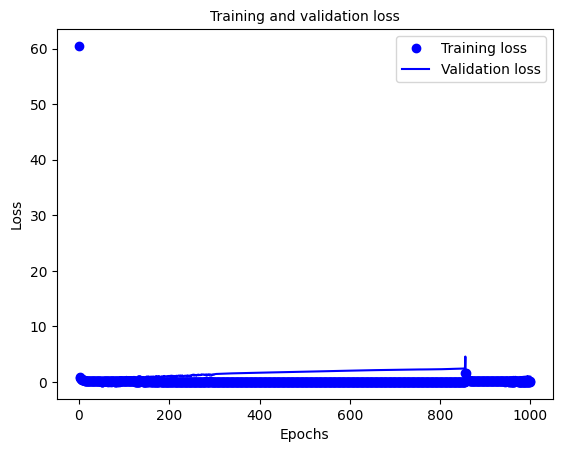

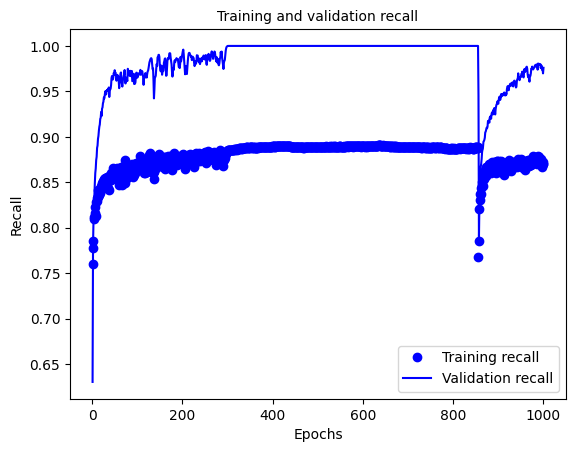

In [27]:
# funcion de perdida respeto a la metrica escogida
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
recall_values = history_dict['val_Recall']
val_recall_values = history_dict['Recall']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(epochs, recall_values, 'bo', label='Training recall')
plt.plot(epochs, val_recall_values, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [28]:
#history_dict

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

In [29]:
# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1202
           1       0.99      0.98      0.98      1219
           2       0.77      0.83      0.80      1205
           3       0.90      0.85      0.88      1184
           4       0.79      0.82      0.80      1202
           5       0.95      0.97      0.96      1211
           6       0.72      0.69      0.70      1218
           7       0.95      0.94      0.94      1159
           8       0.98      0.95      0.97      1197
           9       0.95      0.95      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



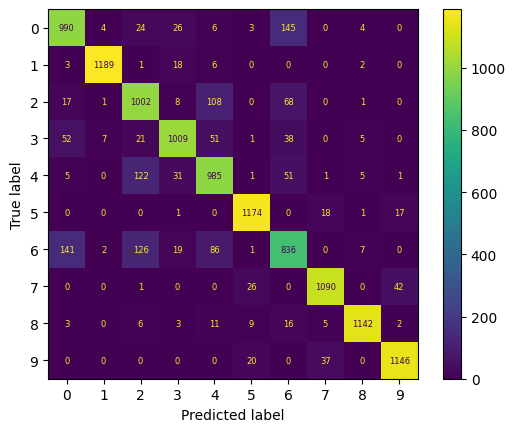

In [30]:
grafica = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_classes))
grafica.plot()
plt.show()


In [59]:
labels

,0,1,2,3,4,5,6,7,8,9
0,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot


- El resultado ha sido muy satisfactorio, siendo un buen modelo,  teniendo unas medias de las metricas analizadas:<br>
Accuracy: 81,75%
Recall: 98.87%
F1_score: 77.12%
- Ahora analizando la confusion matrix, hay ciertos falsos positivos que llaman la atencion respecto a la clase tipificada, destacando:<br>
    - Clase 0(T-shirt/top).- Existe un pico de falsos positivos de 145 respecto a la clase 6(Shirt)<br>
    - Clase 2(Pullover).- Existe un pico de FP de 108 respecto a la clase 4(coat), y es destacable que tambien un numero elevado (68) en la clase 6.<br>
    - Clase 4(Coat).- Existe un pico de 122 FP respecto a la clase 2, repitiendo FP con la clase 6.<br>
    - clase 6(Shirt).- presenta dos picos de 141 y 126 con las clases 0 y 2, y otro tambien numerososo con la clase4 de 86 FP<br>
    CONCLUSION:<br>
    - la clase 6 y la 0 tienen algo las imagenes que hacen que se confundan y fallen, siendo llamativo que la clase 6 es la peor puntucion :72% de accuracy y 69% recall , muy por debajo de la media
    - la clase 2 y 4 tienen algo que hace que confunda las predicciones, teniendo la clase 2: 0.77 y 0.83, y la clase 4:0.79 y 0.82, tambien por debajo de la media pero no tan lejanos.

    

Text(0.5, 1.0, 'Clase 0')

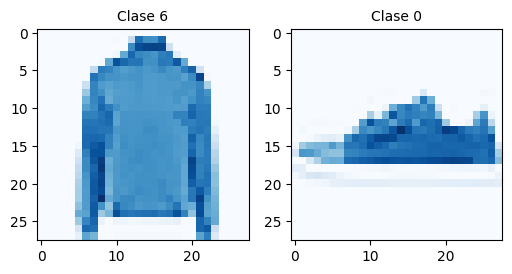

In [62]:
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(X_train[836], cmap = "Blues")
plt.title("Clase 6")
plt.subplot(1, 2, 2)
plt.imshow(X_train[990], cmap = "Blues")
plt.title("Clase 0")

Text(0.5, 1.0, 'Clase 4')

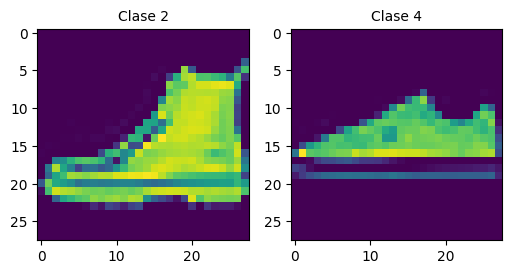

In [65]:
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(X_train[1189], cmap = "viridis")
plt.title("Clase 2")
plt.subplot(1, 2, 2)
plt.imshow(X_train[985], cmap = "viridis")
plt.title("Clase 4")

In [31]:
y_pred_classes

array([8, 8, 7, ..., 8, 8, 3], dtype=int64)

In [57]:
print(y_pred_names, sep="")

['Bag', 'Bag', 'Sneaker', 'T-shirt/top', 'Bag', 'Coat', 'Trouser', 'T-shirt/top', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Coat', 'Ankle boot', 'Coat', 'Trouser', 'Trouser', 'Dress', 'Dress', 'Ankle boot', 'Ankle boot', 'Shirt', 'Pullover', 'Shirt', 'Ankle boot', 'Sneaker', 'Coat', 'Sneaker', 'Ankle boot', 'Coat', 'Dress', 'Coat', 'Coat', 'Sandal', 'T-shirt/top', 'Pullover', 'Ankle boot', 'Bag', 'Trouser', 'Bag', 'Trouser', 'Bag', 'Bag', 'Bag', 'Sandal', 'Ankle boot', 'Shirt', 'Trouser', 'Sneaker', 'Trouser', 'Pullover', 'Pullover', 'Ankle boot', 'Sandal', 'Ankle boot', 'Sneaker', 'Coat', 'Sandal', 'Dress', 'Sandal', 'Pullover', 'Sneaker', 'T-shirt/top', 'Shirt', 'T-shirt/top', 'Ankle boot', 'T-shirt/top', 'Coat', 'Sandal', 'Shirt', 'Bag', 'Trouser', 'Coat', 'Coat', 'Pullover', 'Bag', 'Ankle boot', 'Dress', 'Ankle boot', 'Sneaker', 'Trouser', 'T-shirt/top', 'Trouser', 'Sandal', 'Sneaker', 'Dress', 'Trouser', 'Pullover', 'Sandal', 'Shirt', 'Coat', 'Dress', 'Bag', 'Dress', 'Trouser', 'Trou

In [168]:
#Evaluamos resultados y seleccionamos predicciones con alta confianza
import pandas as pd
def evaluacion(imagen, etiquetas, predicciones, threshold=0.7):
    buenos = predicciones.argmax(axis=1) == etiquetas

    mayor_confianza_errores = []
    for i, correcto in enumerate(buenos):
      if not correcto and np.max(predicciones[i]) > threshold:
           error = (i, predicciones[i], etiquetas[i], np.max(predicciones[i]))
           mayor_confianza_errores.append(error)
    
    df_confia = pd.DataFrame(columns=['Índice', 'Prediccion', 'Etiqueta real', 'Confianza'])
    #itero por la lista anteriorr extrayendo los valores, que iran al df vacio que he creado arriba
    for i, pre_class, true_class, confianza in mayor_confianza_errores:
        df_confia.loc[len(df_confia)] = [i, pre_class.argmax(), true_class, confianza]
    return df_confia

In [171]:
df_confia=evaluacion(X_test, y_test, y_pred)

In [172]:
df_confia

,Índice,Prediccion,Etiqueta real,Confianza
0,3.0,0.0,4.0,0.999122
1,21.0,6.0,0.0,0.993830
2,45.0,9.0,4.0,0.884049
3,63.0,6.0,2.0,0.942394
4,66.0,0.0,6.0,0.946084
...,...,...,...,...
1131,11973.0,0.0,6.0,0.999514
1132,11979.0,2.0,4.0,0.828532
1133,11993.0,6.0,0.0,0.985140
1134,11995.0,5.0,7.0,0.995578


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


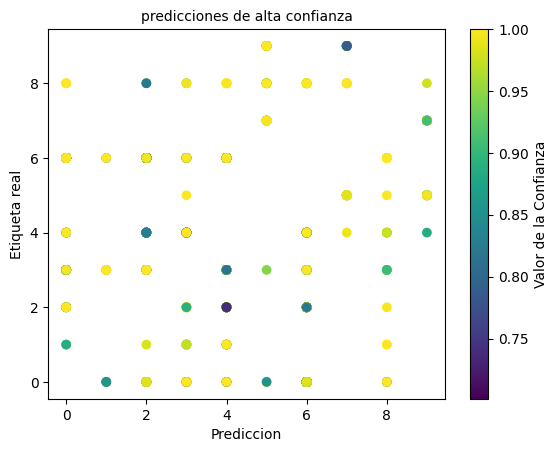

In [179]:
plt.scatter(df_confia['Prediccion'], df_confia['Etiqueta real'], c=df_confia['Confianza'], cmap='viridis')
plt.colorbar(label='Valor de la Confianza')
plt.xlabel('Prediccion')
plt.ylabel('Etiqueta real')
plt.title('predicciones de alta confianza')
plt.legend().remove()
plt.show()

-  Muestra de predicciones segun clase y  el nivel de confianza 

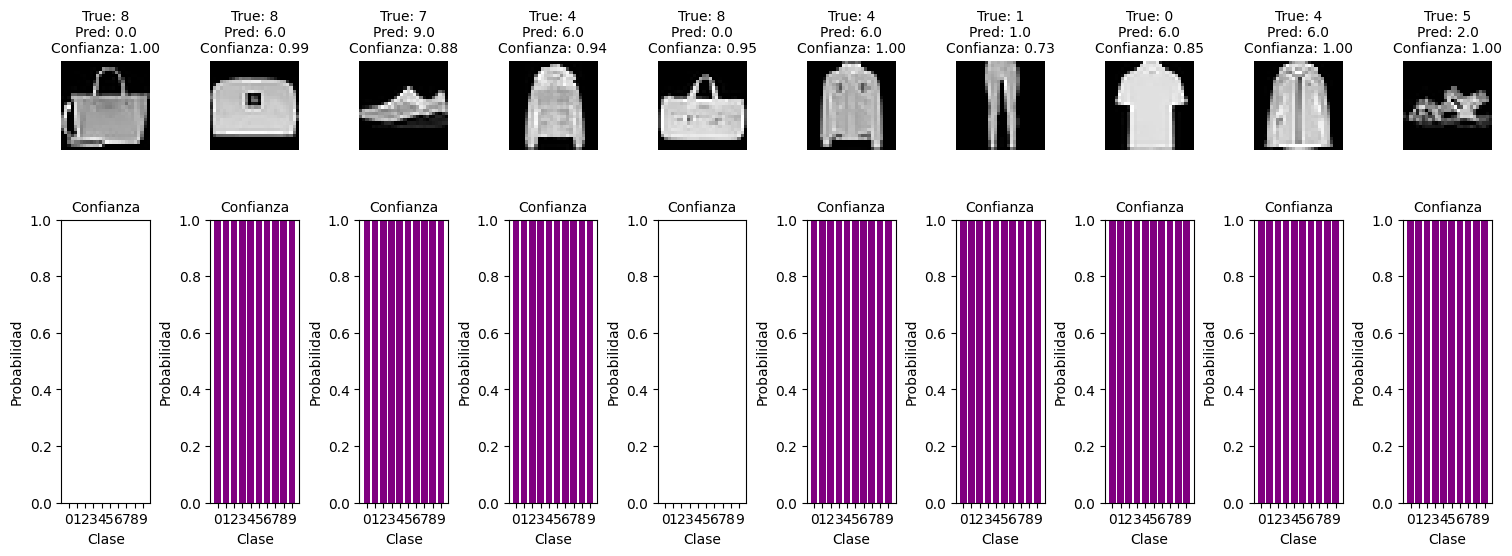

In [173]:

plt.figure(figsize=(15, 6))
num_images = 10

for i in range(min(num_images, len(df_confia))):
    pred, true_class, confianza = df_confia.iloc[i]['Prediccion'], y_test[i], df_confia.iloc[i]['Confianza']
    
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {true_class}\nPred: {pred}\nConfianza: {confianza:.2f}")
    plt.axis('off')

    plt.subplot(2, num_images, + i + 1+ num_images)#para desplaza el índice al inicio de la segunda fila de subgráficos, y no de fallos
    plt.bar(range(10), pred, color='purple')
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title("Confianza")
    plt.xlabel("Clase")
    plt.ylabel("Probabilidad")

plt.tight_layout()
plt.show()



**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

In [44]:
3#Calcular las predicciones del modelo

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [45]:
#Comparar las predicciones con las etiquetas reales para identificar los errores
indices_error = np.where(y_pred_classes != y_test)[0]
indices_error

array([    3,    10,    21, ..., 11993, 11995, 11999], dtype=int64)

In [46]:
# Calculo la confianza maxima del modelo de predicciones
confia = np.max(y_pred, axis=1)
confia

array([1.       , 1.       , 1.       , ..., 1.       , 1.       ,
       0.9728924], dtype=float32)

In [154]:
# Filtramos los errores donde la confianza durante la clasificación en valores erroneos supera el 70%

Errores_70 = []
for i in indices_error:
    if confia[i] > 0.7:
        Errores_70.append((i, y_pred_classes[i], y_test[i], confia[i]))#agrego una tupla con los valores mas importantes
Errores_70 = pd.DataFrame(Errores_70, columns=['index', 'pred', 'real', 'conf'])

In [153]:
Errores_70

,index,pred,real,conf
0,3,0,4,0.999122
1,21,6,0,0.993830
2,45,9,4,0.884049
3,63,6,2,0.942394
4,66,0,6,0.946084
...,...,...,...,...
1131,11973,0,6,0.999514
1132,11979,2,4,0.828532
1133,11993,6,0,0.985140
1134,11995,5,7,0.995578


In [ ]:
y=Errores_70["real"], data=Errores_70, , palette="viridis")

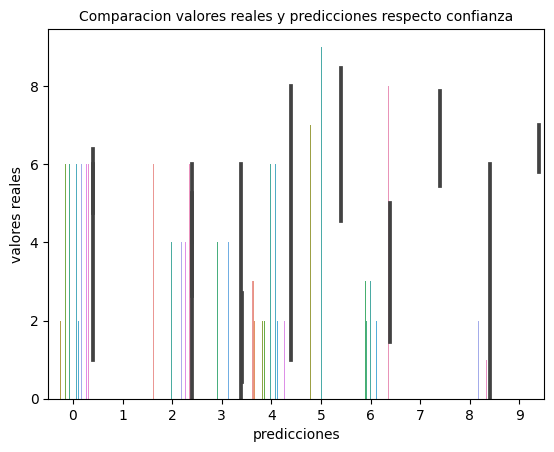

In [177]:
sns.barplot(x=Errores_70['pred'], y=Errores_70['real'], hue=Errores_70['conf'])
plt.xlabel('predicciones')
plt.ylabel('valores reales')
plt.title('Comparacion valores reales y predicciones respecto confianza')
plt.legend().remove()
plt.show();